In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import re
import string
!pip install pythainlp
import pythainlp
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp import Tokenizer

!pip install deepcut
!pip install simpletransformers

In [2]:
df_fake = pd.read_csv("data/fake.csv")
df_true = pd.read_csv("data/real.csv")

In [3]:
df_fake

,title,body,type,W/D/Y,url
0,ข่าวปลอม อย่าแชร์! เว็บไซต์ www.gsb-th-online....,ตามที่มีผู้พบเห็นเว็บไซต์ www.gsb-th-online.co...,การเงิน,11/04/67,GSB Loan
1,ข่าวปลอม อย่าแชร์! ดร.เศรษฐพุฒิ สุทธิวาทนฤพุฒิ...,ตามที่มีคลิปวิดีโอได้เผยแพร่เนื้อหา เกี่ยวกับป...,ความสงบและความมันคง,22/11/64,https://www.bot.or.th/Thai/PressandSpeeches/Sp...
2,เอกสารแถลงการณ์ของสถานทูตเมียนมาร์ในประเทศไทย...,ตามที่มีการเผยแพร่ข่าวสารในสื่อออนไลน์เรื่อง เ...,นโยบายรัฐบาล-ข่าวสาร,22/11/64,https://www.antifakenewscenter.com/%e0%b8%84%e...
3,‘กกต.’ แจงวุ่นเฟคนิวส์ หมายเลข ‘เพื่อไทย-ก้าวไ...,เมื่อวันที่ 27 เมษายน สำนักงานคณะกรรมการการเลื...,นโยบายรัฐบาล-ข่าวสาร,27/04/66,https://www.matichon.co.th/politics/news_3946572
4,ข่าวปลอม! มีการลักลอบนำชาวมุสลิมต่างด้าวเข้าภู...,จากกรณีข่าวลือที่ระบุว่าผู้ว่าจังหวัดภูเก็ตเหม...,นโยบายรัฐบาล-ข่าวสาร,31/01/65,https://mgronline.com/uptodate/detail/96500000...
...,...,...,...,...,...
303,พายุไต้ฝุ่นเข้าไทย ฝนตกหนักที่สุดในรอบ 10 ปี น...,ตามที่มีการเผยแพร่ข้อมูลเรื่องพายุไต้ฝุ่นเข้าไ...,ภัยพิบัติ,10/08/66,https://www.antifakenewscenter.com/%e0%b8%a0%e...
304,ใช้ปัสสาวะหยอดจมูกรักษาโรคไซนัสได้,ตามที่มีการโพสต์และแชร์ข้อความในสื่อต่าง ๆ ถึง...,ผลิตภัณฑ์สุขภาพ,09/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...
305,ใช้ปัสสาวะหยอดจมูกรักษาโรคไซนัสได้,ตามที่มีการโพสต์และแชร์ข้อความในสื่อต่าง ๆ ถึง...,ผลิตภัณฑ์สุขภาพ,09/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...
306,ไลน์ผู้บริหารของสำนัก ก.ล.ต. ชักชวนลงทุน,ตามที่มีข่าวสารในประเด็นเรื่องไลน์ผู้บริหารของ...,การเงิน-หุ้น,09/08/66,https://www.antifakenewscenter.com/%e0%b8%81%e...


In [4]:
df_true

,title,body,summary,type,year,url
0,กมธ. ถกร่าง พ.ร.บ.สมรสเท่าเทียม โค้งสุดท้าย\n ...,“รัดเกล้า” แจง กมธ.ประชุมกลั่นกรองร่าง พ.ร.บ.ส...,สำหรับขั้นตอนสุดท้าย คือการมอบหมายให้ฝ่ายเลขาน...,นโยบายรัฐ,2567,https://www.thairath.co.th/news/politic/2770315
1,"คืบหน้าแก้หนี้นอกระบบ ไกล่เกลี่ยสำเร็จ 21,249\...",ปลัดมหาดไทย เผยคืบหน้าการแก้ปัญหาหนี้นอกระบบ ล...,ซึ่งเจ้าหนี้และลูกหนี้ได้มาพบปะพูดคุยกัน โดยมี...,นโยบายรัฐ,2567,https://www.thairath.co.th/news/politic/2770309
2,สส.เพื่อไทย ชี้เหตุผล “เศรษฐา” เป็นเซลส์แมน\nป...,ปลัดมหาดไทย เผยคืบหน้าการแก้ปัญหาหนี้นอกระบบ ล...,นายณณัฏฐ์ ระบุต่อไปว่า “อยากให้คนไทยมองเห็นควา...,นโยบายรัฐ,2567,https://www.thairath.co.th/news/politic/2770295
3,อภิสิทธิ์ ไม่หวั่นสุเทพตั้งพรรคหนุนประยุทธ์\n ...,จะไม่เป็นนักการเมืองอีกแล้ว21 ก.พ.2561 จากกรณี...,ณัฐวุฒิ แนะจับตา เชน-ธานี-เอกนัฏ ซบพรรค วิทยา ...,นโยบายรัฐ,2563,https://prachatai.com/journal/2018/02/75549
4,2 ป. “แยกกันเดิน” แต่ถูกจับ “ตีรวมกัน”,เปิดศักราชปี 2566 ด้วยการประกาศ “แยกทาง-แยกพรร...,\n\nท้ายที่สุดพรรค พปชร. ที่เคยเป็นพรรค 116 เส...,นโยบายรัฐ,2566,https://www.bbc.com/thai/articles/cye6kzljz8go
...,...,...,...,...,...,...
500,ขสมก. เปิดลงทะเบียนบัตรโดยสารผ่านเว็บไซต์ แตะส...,องค์การขนส่งมวลชนกรุงเทพ (ขสมก.) อำนวยความสะดว...,ขสมก. เปิดลงทะเบียนบัตรโดยสารผ่านเว็บไซต์ แตะส...,นโยบายรัฐ,09/07/63,https://www.blockdit.com/posts/5f05bc2ce4027b4...
501,ครม. อนุมัติใช้มอเตอร์เวย์ 2 สายฟรี ตั้งแต่ 24...,เมื่อ 14 กรกฎาคม 2563 ที่ประชุมคณะรัฐมนตรี มี...,ครม. อนุมัติใช้มอเตอร์เวย์ 2 สายฟรี ตั้งแต่ 24...,นโยบายรัฐ,18/07/63,https://www.motorival.com/%E0%B8%87%E0%B8%94%E...
502,\r\n11 โรงพยาบาลในสังกัดกทม. ตรวจคัดกรองโรคทั่...,ผู้ว่าราชการกรุงเทพมหานคร เปิดเผยว่า เนื่องในว...,11 โรงพยาบาลในสังกัดกทม. ตรวจคัดกรองโรคทั่วไป...,การเเพทย์,19/07/63,https://siamrath.co.th/n/169893
503,นายกฯ สั่งแบล็คลิสต์โรงแรมที่ฉวยโอกาสขึ้นราคาจ...,นายกฯ สั่งแบล็คลิสต์โรงแรมที่ฉวยโอกาสขึ้นราคาจ...,นายกฯ สั่งแบล็คลิสต์โรงแรมที่ฉวยโอกาสขึ้นราคาจ...,นโยบายรัฐ,22/07/63,https://m.facebook.com/TheReportersTH/photos/a...


In [5]:
df_fake.shape, df_true.shape

((308, 5), (505, 6))

In [6]:
df_fake["class"] = 0
df_true["class"] = 1

In [7]:
df_fake

,title,body,type,W/D/Y,url,class
0,ข่าวปลอม อย่าแชร์! เว็บไซต์ www.gsb-th-online....,ตามที่มีผู้พบเห็นเว็บไซต์ www.gsb-th-online.co...,การเงิน,11/04/67,GSB Loan,0
1,ข่าวปลอม อย่าแชร์! ดร.เศรษฐพุฒิ สุทธิวาทนฤพุฒิ...,ตามที่มีคลิปวิดีโอได้เผยแพร่เนื้อหา เกี่ยวกับป...,ความสงบและความมันคง,22/11/64,https://www.bot.or.th/Thai/PressandSpeeches/Sp...,0
2,เอกสารแถลงการณ์ของสถานทูตเมียนมาร์ในประเทศไทย...,ตามที่มีการเผยแพร่ข่าวสารในสื่อออนไลน์เรื่อง เ...,นโยบายรัฐบาล-ข่าวสาร,22/11/64,https://www.antifakenewscenter.com/%e0%b8%84%e...,0
3,‘กกต.’ แจงวุ่นเฟคนิวส์ หมายเลข ‘เพื่อไทย-ก้าวไ...,เมื่อวันที่ 27 เมษายน สำนักงานคณะกรรมการการเลื...,นโยบายรัฐบาล-ข่าวสาร,27/04/66,https://www.matichon.co.th/politics/news_3946572,0
4,ข่าวปลอม! มีการลักลอบนำชาวมุสลิมต่างด้าวเข้าภู...,จากกรณีข่าวลือที่ระบุว่าผู้ว่าจังหวัดภูเก็ตเหม...,นโยบายรัฐบาล-ข่าวสาร,31/01/65,https://mgronline.com/uptodate/detail/96500000...,0
...,...,...,...,...,...,...
303,พายุไต้ฝุ่นเข้าไทย ฝนตกหนักที่สุดในรอบ 10 ปี น...,ตามที่มีการเผยแพร่ข้อมูลเรื่องพายุไต้ฝุ่นเข้าไ...,ภัยพิบัติ,10/08/66,https://www.antifakenewscenter.com/%e0%b8%a0%e...,0
304,ใช้ปัสสาวะหยอดจมูกรักษาโรคไซนัสได้,ตามที่มีการโพสต์และแชร์ข้อความในสื่อต่าง ๆ ถึง...,ผลิตภัณฑ์สุขภาพ,09/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...,0
305,ใช้ปัสสาวะหยอดจมูกรักษาโรคไซนัสได้,ตามที่มีการโพสต์และแชร์ข้อความในสื่อต่าง ๆ ถึง...,ผลิตภัณฑ์สุขภาพ,09/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...,0
306,ไลน์ผู้บริหารของสำนัก ก.ล.ต. ชักชวนลงทุน,ตามที่มีข่าวสารในประเด็นเรื่องไลน์ผู้บริหารของ...,การเงิน-หุ้น,09/08/66,https://www.antifakenewscenter.com/%e0%b8%81%e...,0


In [8]:
df_fake.index

RangeIndex(start=0, stop=308, step=1)

In [9]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(307,298,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(504,495,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
df_fake.shape, df_true.shape

((299, 6), (496, 7))

In [11]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

/tmp/ipykernel_619/860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
/tmp/ipykernel_619/860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [12]:
df_fake_manual_testing.head()

,title,body,type,W/D/Y,url,class
298,การอั้นปัสสาวะบ่อยเป็นโรคนิ่วได้,ตามที่มีการโพสต์ข้อมูลผ่านโซเชียลมีเดียเกี่ยวก...,ผลิตภัณฑ์สุขภาพ,10/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...,0
299,เอกสารสำคัญใบเสนอขายแสดงสิทธิอนุพันธ์ห้างทองชื...,ตามที่มีข้อมูลปรากฏเกี่ยวกับเรื่องเอกสารสำคัญใ...,การเงิน-หุ้น,10/08/66,https://www.antifakenewscenter.com/%e0%b8%81%e...,0
300,กดบัตรเติมน้ำมัน PTT หลักร้อยได้ที่แอปฯ ชอปออน...,ตามที่มีข่าวสารในสื่อต่าง ๆ เกี่ยวกับเรื่องกดบ...,การเงิน-หุ้น,10/08/66,https://www.antifakenewscenter.com/%e0%b8%81%e...,0
301,น้ำปั่นผักและใบไม้สดที่ไม่ผ่านความร้อนช่วยรักษ...,ตามที่มีข้อมูลแนะนำเกี่ยวกับประเด็นเรื่องน้ำปั...,ผลิตภัณฑ์สุขภาพ,10/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...,0
302,ไลน์จริงกรมบัญชีกลางเปิดโหลดลิงก์ส่งเอกสาร ผู้...,ตามที่มีการแชร์ข้อมูลในสื่อโซเชียลเรื่องไลน์จร...,นโยบายรัฐบาล-ข่าวสาร,10/08/66,https://www.antifakenewscenter.com/%e0%b8%99%e...,0


In [13]:
# pd.concat(): ใช้เพื่อรวม DataFrame ข่าวปลอมและ DataFrame ข่าวจริงเข้าด้วยกัน โดยกำหนดพารามิเตอร์ axis=0 เพื่อรวมตามแนวแถว (แนวดิ่ง) เพื่อให้ข้อมูลข่าวปลอมและข่าวจริงเรียงต่อกันใน DataFrame เดียว
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)

In [14]:
df_manual_testing

,title,body,type,W/D/Y,url,class,summary,year
298,การอั้นปัสสาวะบ่อยเป็นโรคนิ่วได้,ตามที่มีการโพสต์ข้อมูลผ่านโซเชียลมีเดียเกี่ยวก...,ผลิตภัณฑ์สุขภาพ,10/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...,0,NaN,NaN
299,เอกสารสำคัญใบเสนอขายแสดงสิทธิอนุพันธ์ห้างทองชื...,ตามที่มีข้อมูลปรากฏเกี่ยวกับเรื่องเอกสารสำคัญใ...,การเงิน-หุ้น,10/08/66,https://www.antifakenewscenter.com/%e0%b8%81%e...,0,NaN,NaN
300,กดบัตรเติมน้ำมัน PTT หลักร้อยได้ที่แอปฯ ชอปออน...,ตามที่มีข่าวสารในสื่อต่าง ๆ เกี่ยวกับเรื่องกดบ...,การเงิน-หุ้น,10/08/66,https://www.antifakenewscenter.com/%e0%b8%81%e...,0,NaN,NaN
301,น้ำปั่นผักและใบไม้สดที่ไม่ผ่านความร้อนช่วยรักษ...,ตามที่มีข้อมูลแนะนำเกี่ยวกับประเด็นเรื่องน้ำปั...,ผลิตภัณฑ์สุขภาพ,10/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...,0,NaN,NaN
302,ไลน์จริงกรมบัญชีกลางเปิดโหลดลิงก์ส่งเอกสาร ผู้...,ตามที่มีการแชร์ข้อมูลในสื่อโซเชียลเรื่องไลน์จร...,นโยบายรัฐบาล-ข่าวสาร,10/08/66,https://www.antifakenewscenter.com/%e0%b8%99%e...,0,NaN,NaN
303,พายุไต้ฝุ่นเข้าไทย ฝนตกหนักที่สุดในรอบ 10 ปี น...,ตามที่มีการเผยแพร่ข้อมูลเรื่องพายุไต้ฝุ่นเข้าไ...,ภัยพิบัติ,10/08/66,https://www.antifakenewscenter.com/%e0%b8%a0%e...,0,NaN,NaN
304,ใช้ปัสสาวะหยอดจมูกรักษาโรคไซนัสได้,ตามที่มีการโพสต์และแชร์ข้อความในสื่อต่าง ๆ ถึง...,ผลิตภัณฑ์สุขภาพ,09/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...,0,NaN,NaN
305,ใช้ปัสสาวะหยอดจมูกรักษาโรคไซนัสได้,ตามที่มีการโพสต์และแชร์ข้อความในสื่อต่าง ๆ ถึง...,ผลิตภัณฑ์สุขภาพ,09/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...,0,NaN,NaN
306,ไลน์ผู้บริหารของสำนัก ก.ล.ต. ชักชวนลงทุน,ตามที่มีข่าวสารในประเด็นเรื่องไลน์ผู้บริหารของ...,การเงิน-หุ้น,09/08/66,https://www.antifakenewscenter.com/%e0%b8%81%e...,0,NaN,NaN
307,3 จุดสังเกตสัญญาณไตมีปัญหา,ตามที่มีการเผยแพร่ข้อมูลในสื่อออนไลน์เรื่อง 3 ...,ผลิตภัณฑ์สุขภาพ,09/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...,0,NaN,NaN


In [15]:
df_manual_testing.to_csv("manual_testing.csv")

In [16]:
df_merge = pd.concat([df_fake, df_true], axis =0 )

In [17]:
df_merge.columns

Index(['title', 'body', 'type', 'W/D/Y', 'url', 'class', 'summary', 'year'], dtype='object')

In [18]:
df_drop=df_merge.drop(["title", "type","W/D/Y","url","year","summary"], axis = 1)

In [19]:
df_drop.isnull().sum()

body     0
class    0
dtype: int64

In [20]:
df_drop

,body,class
0,ตามที่มีผู้พบเห็นเว็บไซต์ www.gsb-th-online.co...,0
1,ตามที่มีคลิปวิดีโอได้เผยแพร่เนื้อหา เกี่ยวกับป...,0
2,ตามที่มีการเผยแพร่ข่าวสารในสื่อออนไลน์เรื่อง เ...,0
3,เมื่อวันที่ 27 เมษายน สำนักงานคณะกรรมการการเลื...,0
4,จากกรณีข่าวลือที่ระบุว่าผู้ว่าจังหวัดภูเก็ตเหม...,0
...,...,...
491,ปัจจุบันมีการใช้อาวุธปืนทำร้ายร่างกายผู้อื่นเพ...,1
492,กรมอุทยานแห่งชาติ สัตว์ป่า และพันธุ์พืช รับแจ้...,1
493,เมื่อสูบบุหรี่ไฟฟ้า นิโคตินเหลวในบุหรี่ไฟฟ้าจะ...,1
494,คณะรัฐมนตรี มีมติเห็นชอบนโยบายกำกับการนำเข้าเศ...,1


In [21]:
def wordopt(text):
    text = text.lower()                                                               #แปลงข้อความทั้งหมดให้เป็นตัวอักษรพิมพ์เล็กทั้งหมด
    text = re.sub('\[.*?\]', '', text)                                                #ลบข้อความที่อยู่ในวงเล็บเหลี่ยมทั้งหมดออก
    text = re.sub("\\W"," ",text)                                                     #แทนทุกตัวอักษรที่ไม่ใช่ตัวอักษรหรือตัวเลขด้วยช่องว่าง
    text = re.sub('https?://\S+|www\.\S+', '', text)                                  #ลบ URL หรือลิงก์ออกจากข้อความ
    text = re.sub('<.*?>+', '', text)                                                 #ลบ tag HTML ออกจากข้อความ
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)                   #ลบเครื่องหมายวรรคตอนออกจากข้อความ
    text = re.sub('\n', '', text)                                                     #ลบเครื่องหมายขึ้นบรรทัดใหม่ออกจากข้อความ
    text = re.sub('\w*\d\w*', '', text)                                               #ลบคำที่มีตัวเลขอยู่ในข้อความออก
    text = re.sub('a-zA-Zn-๙0-9', '', text)                                          #ลบตัวอักษร a-z, A-Z, ตัวเลข, และตัวอักษรไทยออกจากข้อความ
    return text

In [22]:
df_drop

,body,class
0,ตามที่มีผู้พบเห็นเว็บไซต์ www.gsb-th-online.co...,0
1,ตามที่มีคลิปวิดีโอได้เผยแพร่เนื้อหา เกี่ยวกับป...,0
2,ตามที่มีการเผยแพร่ข่าวสารในสื่อออนไลน์เรื่อง เ...,0
3,เมื่อวันที่ 27 เมษายน สำนักงานคณะกรรมการการเลื...,0
4,จากกรณีข่าวลือที่ระบุว่าผู้ว่าจังหวัดภูเก็ตเหม...,0
...,...,...
491,ปัจจุบันมีการใช้อาวุธปืนทำร้ายร่างกายผู้อื่นเพ...,1
492,กรมอุทยานแห่งชาติ สัตว์ป่า และพันธุ์พืช รับแจ้...,1
493,เมื่อสูบบุหรี่ไฟฟ้า นิโคตินเหลวในบุหรี่ไฟฟ้าจะ...,1
494,คณะรัฐมนตรี มีมติเห็นชอบนโยบายกำกับการนำเข้าเศ...,1


In [23]:
df_drop.to_csv("df_drop.csv")

In [24]:
df = df_drop

In [25]:
df

,body,class
0,ตามที่มีผู้พบเห็นเว็บไซต์ www.gsb-th-online.co...,0
1,ตามที่มีคลิปวิดีโอได้เผยแพร่เนื้อหา เกี่ยวกับป...,0
2,ตามที่มีการเผยแพร่ข่าวสารในสื่อออนไลน์เรื่อง เ...,0
3,เมื่อวันที่ 27 เมษายน สำนักงานคณะกรรมการการเลื...,0
4,จากกรณีข่าวลือที่ระบุว่าผู้ว่าจังหวัดภูเก็ตเหม...,0
...,...,...
491,ปัจจุบันมีการใช้อาวุธปืนทำร้ายร่างกายผู้อื่นเพ...,1
492,กรมอุทยานแห่งชาติ สัตว์ป่า และพันธุ์พืช รับแจ้...,1
493,เมื่อสูบบุหรี่ไฟฟ้า นิโคตินเหลวในบุหรี่ไฟฟ้าจะ...,1
494,คณะรัฐมนตรี มีมติเห็นชอบนโยบายกำกับการนำเข้าเศ...,1


In [26]:
# import deepcut
# from pythainlp.corpus import thai_stopwords

In [27]:
# def preprocess_thai_text(text):
#     # Tokenize the text using deepcut
#     tokens = deepcut.tokenize(text)
    
#     # Remove stopwords
#     tokens_without_stopwords = [token for token in tokens if token not in thai_stopwords()]
    
#     # Lemmatize the tokens (deepcut already performs lemmatization)
#     lemmatized_tokens = tokens_without_stopwords
    
#     return lemmatized_tokens

In [28]:
# input_text = "การประมูลเป็นกระบวนการที่น่าสนใจ"
# processed_tokens = preprocess_thai_text(input_text)
# print(processed_tokens)

In [29]:
rm -rf ~/.cache/matplotlib

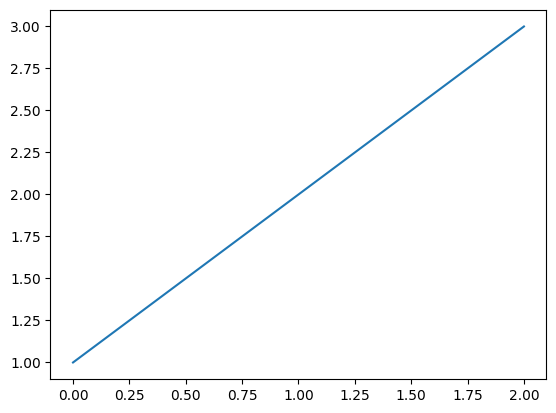

In [30]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3])
plt.show()

In [31]:
!pip install sklearn_crfsuite
!pip install emoji
!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
!pip install fastai
!wget https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip
!unzip master.zip
!mkdir wisesight_data; ls
!cd wisesight-sentiment-master/kaggle-competition; ls

  Using cached https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
--2024-05-02 05:29:37--  https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/PyThaiNLP/wisesight-sentiment/zip/refs/heads/master [following]
--2024-05-02 05:29:37--  https://codeload.github.com/PyThaiNLP/wisesight-sentiment/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.2’

master.zip.2            [                 <=>]   

In [61]:
!pip install --upgrade matplotlib

In [42]:
rm -rf ~/.cache/matplotlib

In [43]:
import matplotlib as mpl
import os

# Clear the font cache
mpl.get_cachedir()
cache_dir = os.path.join(mpl.get_cachedir(), 'fontList.cache')
if os.path.exists(cache_dir):
    os.remove(cache_dir)


In [44]:
import matplotlib.pyplot as plt

# Set custom font family
plt.rcParams['font.family'] = 'font_manager.FontProperties'  # Example: Use 'Arial' as the custom font


In [45]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from pythainlp import word_tokenize
from tqdm import tqdm_notebook
from pythainlp.ulmfit import process_thai

#viz
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
?process_thai


Signature:
process_thai(
    text: str,
    pre_rules: Collection = [<function fix_html at 0xffff0968a7a0>, <function reorder_vowels at 0xffff350fb9c0>, <function spec_add_spaces at 0xffff09558360>, <function rm_useless_spaces at 0xffff09558040>, <function rm_useless_newlines at 0xffff08a16f20>, <function rm_brackets at 0xffff08a16fc0>, <function replace_url at 0xffff09543ec0>, <function replace_rep_nonum at 0xffff08a171a0>],
    tok_func: Callable = <bound method Tokenizer.word_tokenize of <pythainlp.tokenize.core.Tokenizer object at 0xffff35084390>>,
    post_rules: Collection = [<function ungroup_emoji at 0xffff08a17060>, <function lowercase_all at 0xffff08a17100>, <function replace_wrep_post_nonum at 0xffff08a17240>, <function remove_space at 0xffff08a172e0>],
) -> Collection[str]
Docstring:
Process Thai texts for models (with sparse features as default)

:param str text: text to be cleaned
:param list[func] pre_rules: rules to apply before tokenization.
:param func tok_func: token

In [46]:
from pythainlp.ulmfit import *
process_thai("บ้านนนนน ()อยู่นานนานนาน 😂🤣😃😄😅 PyThaiNLP amp;     www.google.com")

['บ้าน',
 'xxrep',
 'อยู่',
 'xxwrep',
 'นาน',
 '😂',
 '🤣',
 '😃',
 '😄',
 '😅',
 'pythainlp',
 '&',
 'xxurl']

In [47]:
with open("wisesight-sentiment-master/kaggle-competition/train.txt") as f:
    texts = [line.strip() for line in f.readlines()]

with open("wisesight-sentiment-master/kaggle-competition/train_label.txt") as f:
    categories = [line.strip() for line in f.readlines()]

all_df = pd.DataFrame({"category":categories, "texts":texts})
all_df.to_csv('all_df.csv',index=False)
all_df.shape

(24063, 2)

In [48]:
with open("wisesight-sentiment-master/kaggle-competition/test.txt") as f:
    texts = [line.strip() for line in f.readlines()]

test_df = pd.DataFrame({"category":"test", "texts":texts})
test_df.shape

(2674, 2)

In [56]:
## Load Data

In [49]:
all_df["processed"] = all_df.texts.map(lambda x: "|".join(process_thai(x)))
all_df["wc"] = all_df.processed.map(lambda x: len(x.split("|")))
all_df["uwc"] = all_df.processed.map(lambda x: len(set(x.split("|"))))

test_df["processed"] = test_df.texts.map(lambda x: "|".join(process_thai(x)))
test_df["wc"] = test_df.processed.map(lambda x: len(x.split("|")))
test_df["uwc"] = test_df.processed.map(lambda x: len(set(x.split("|"))))

In [50]:
#prevalence
all_df.category.value_counts() / all_df.shape[0]

category
neu    0.544612
neg    0.255164
pos    0.178698
q      0.021527
Name: count, dtype: float64

In [55]:
## Train-validation Split

In [51]:
#when finding hyperparameters
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_df, test_size=0.15, random_state=1412)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

#when actually doing it
# train_df = all_df.copy()
# valid_df = pd.read_csv('valid_df.csv')

In [52]:
valid_df.head()

,category,texts,processed,wc,uwc
0,neu,เห็นคนลบแอพ viu ก็เห็นใจและเข้าใจเขานะคะ แผลมั...,เห็น|คน|ลบ|แอ|พ|viu|ก็|เห็นใจ|และ|เข้าใจ|เขา|น...,45,40
1,neu,ไปชมไม้คิวของแชมป์ และรองแชมป์ กันจ้า! ..........,ไป|ชม|ไม้|คิว|ของ|แชมป์|และ|รอง|แชมป์|กัน|จ้า|...,41,39
2,neg,กลุ่มรถซีวิคเป็นกลุ่มที่น่ารำคานมากกกกกกกกก อว...,กลุ่ม|รถ|ซีวิค|เป็น|กลุ่ม|ที่|น่า|รำ|คานมาก|xx...,42,31
3,neu,อยากสวยเหมือนเจ้าของแบรนด์สิคะ เนย โชติกา ใบหน...,อยาก|สวย|เหมือน|เจ้าของ|แบรนด์|สิ|คะ|เนย|โชติ|...,69,53
4,neg,ข้าวโถละร้อย แพง เพราะตักเป็นจานๆละ15 เต็มที่ก...,ข้าว|โถ|ละ|ร้อย|แพง|เพราะ|ตัก|เป็น|จาน|ๆ|ละ|15...,359,227


In [53]:
#prevalence
print(train_df["category"].value_counts() / train_df.shape[0])

category
neu    0.544957
neg    0.253557
pos    0.180071
q      0.021415
Name: count, dtype: float64


In [57]:
## Logistic Regression

In [58]:
#dependent variables
y_train = train_df["category"]
y_valid = valid_df["category"]

In [59]:
#text faetures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=process_thai, ngram_range=(1,2), min_df=20, sublinear_tf=True)
tfidf_fit = tfidf.fit(all_df["texts"])
text_train = tfidf_fit.transform(train_df["texts"])
text_valid = tfidf_fit.transform(valid_df["texts"])
text_test = tfidf_fit.transform(test_df["texts"])
text_train.shape, text_valid.shape

/opt/conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((20453, 4288), (3610, 4288))

In [69]:
!pip install myvisualization

ERROR: Could not find a version that satisfies the requirement myvisualization (from versions: none)
ERROR: No matching distribution found for myvisualization


In [71]:
from visualize import top_feats_all, plot_top_feats
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a TF-IDF vectorizer and text data
tfidf_vectorizer = TfidfVectorizer()
tfidf_fit = tfidf_vectorizer.fit(text_train)

features = tfidf_fit.get_feature_names()

# Call the top_feats_all function to get top features
ts = top_feats_all(text_train.toarray(), y_train, features)

# Plot top features
plot_top_feats(ts)


ModuleNotFoundError: No module named 'visualize'

In [64]:
#visualize texts
from visualize import top_feats_all, plot_top_feats
features = tfidf_fit.get_feature_names()
%time ts = top_feats_all(text_train.toarray(), y_train, features)
print(ts[0].shape)
ts[0].head()

ModuleNotFoundError: No module named 'visualize'